# Hypotesetest

Jeg vil her gi et eksempel på en hypotesetest som tar utgangspunkt i
temperaturene i Bergen vi studerte i første uken av dette kurset.

Vi har sett at temperaturene ser ut til å ha økt i perioden vi har
målinger for. 

La oss gjette på at temperaturen har økt med mere enn en grad i
gjennomsnitt. 

Mere presist vil jeg gjøre utsagnet at på en tilfeldig kalenderdag
i løpet av de siste ti årene er temperaturen mere enn en grad høyere
enn den var på den samme kalenderdagen i året 40 år tidligere.

Jeg vil bruke de daglige temperaturmålingene i de siste 3652
dagene (de siste ti årene) og de 3652 dagene som var 40 år tidligere
for å teste denne hypotesen.

For $i = 1, \dots, 3652$ la $y_i$ være temperaturen for $i$ dager siden
minus temperaturen for $i$ dager og $40$ år siden. Mitt gjett er at
gjennomsnittet $E(y)$ av tallene $y_i$ er større enn $1\ C^{\circ}$.

**Nullhypotese ($H_0)$:** Gjennomsnittet $E(y)$ er lik $\mu_0 = 1\ C^{\circ}$.

**Alternative hypotese ($H_1$):** Gjennomsnittet $E(y)$ er større enn $\mu_0 = 1 \ C^{\circ}$.

In [1]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [2]:
# Her importeres modulen pandas som pd sammen med numpy og matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t



In [3]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [4]:
import scipy.stats

In [19]:
scipy.stats.norm

In [5]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1973, 1, 1)
end = datetime.today()

In [6]:
# Vi angir GPS koordinatene til Bergen
# Google maps gir oss koordinatene under. Høyden gjetter jeg meg til.

bergen = meteostat.Point(60.38526, 5.328060, 10)

In [7]:
# Vi laster ned daglige målinger for den angitte tidsperioden

data = meteostat.Daily(bergen, start, end)
data = data.fetch()


In [8]:
# setter endedato til å være siste dag vi har data for
end = data.index[-1]

In [9]:
# Vi setter gårdsdagens temperatur inn på dagene der temperatur mangler:
data['tavg_ffill'] = data['tavg'].ffill()

In [10]:
# Plotter daglige temperaturer og regresjonslinjen mot tid
y1 = data.loc[end - timedelta(days=int(365.24 * 10)): end]['tavg_ffill'].values 
y2 = data.loc[end - timedelta(days=(365.2425 * 10)) - timedelta(days=int(365.2425 * 40)): end - timedelta(days=int(365.2425 * 40))]['tavg_ffill'].values
y = y1 - y2

In [11]:
# Lager pandas dataframe med temperaturdifferanser. 
# Dette for å ha funksjonaliteten til pandas tilgjengelig.
data2 = pd.DataFrame(y, columns=['temperaturdifferanse'])

<Axes: >

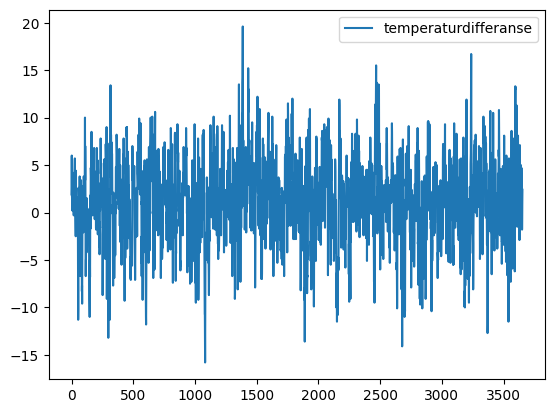

In [12]:
data2.plot(y=['temperaturdifferanse'])

## Normalfordeling

I mange situasjoner observerer vi noe som varierer av en sammensatt grunn. 

En typisk egenskap ved observasjoner som varierer av samensatte årsaker er at de ofte får en **normalfordeling**. 

Med mindre vi har spesiell grunn til å tro noe annet, så regner vi med at
observasjonene våre varier med en tilnærmet normalfordeling. 

Normalfordelingen har mange godt kjente
egenskaper. Den er f.eks. symetrisk rundt sin forventningsverdi, μ, og den streker seg uendelig langt
i begge retninger. 

Det er mest sannsynlig at vi gjør observasjoner i nærheten av forventningsverdien,
og det finnes en svært liten sannsynlighet for å observere et tall som ligger langt fra forventningsverdien.

Fordelingen kan beskrives vha forventningsverdien μ og standardavviket σ.

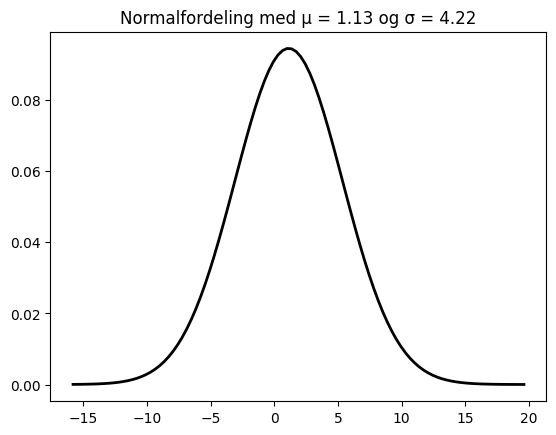

In [25]:
# Plotter normalfordeling med samme gjennomsnitt of standardavvik som observasjonene våre

xmin = np.min(y)
xmax = np.max(y)
mu, std = scipy.stats.norm.fit(data2['temperaturdifferanse'])
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Normalfordeling med μ = {:.2f} og σ = {:.2f}".format(mu, std)
plt.title(title);

## Kriterier for hypotesetest

For å teste denne hypotesen vil jeg bruke en $t$-test. Jeg har ett
utvalg av temperaturforskjeller $y_1, \dots, y_{3652}$, og nullhypotesen
er at gjennomsnittet av disse tallene er lik $1 \ C^{\circ}$.

En forutsetning for å bruke en $t$-test er at målingene er
normalfordelte. Jeg vet ikke på forhånd om målingene er normalfordelte,
men jeg kan danne meg en formening om dette ved å se på et histogram av
målingene. Jeg kan finne normalfordelingskurven som passer best til
mitt data og sammenligne de to.

Hvis det ser bra ut kan jeg fortsette. Ellers må jeg finne en annen
metode eller en annen hypotese.

**Sjekker på data:**

Plotter først et histogram av data. 

(Teller hvor mange datapunkter i hvert delintervall i en oppdeling av intervallet av observerte verdier.)

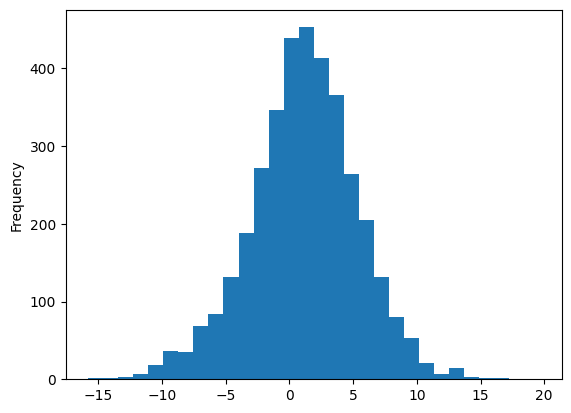

In [13]:
# Plotter histogram av temperaturdifferanser. 
data2['temperaturdifferanse'].plot.hist(bins=30)
xmin, xmax = plt.xlim()

Plotter deretter normalfordelinge med samme gjennomsnitt $E(y)$ og spredning $\sigma(y)$ som data opp på histogrammet for data. 

Jeg kan visuellt avgjøre om data ser ut som om data er normalfordelt. Her under ser data normalfordelt ut.

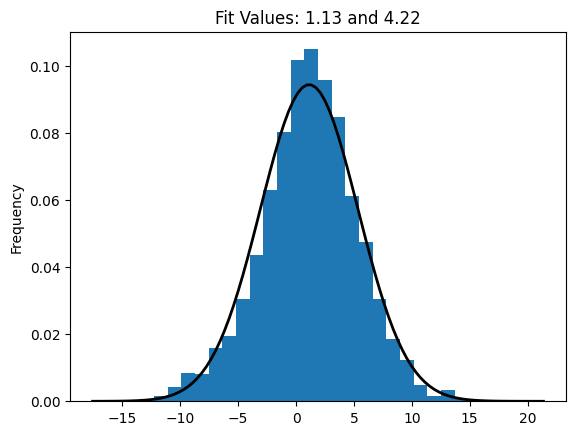

In [27]:
mu, std = scipy.stats.norm.fit(data2['temperaturdifferanse'])
data2['temperaturdifferanse'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), scipy.stats.norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title);

Siden data ser normalfordelt ut kan jeg fortsette med å beregne $t$-verdien og
$p$-verdien. Formelen for $t$-verdien er
$$t = \frac{E(y) - \mu_0}{\sigma(y)/\sqrt{n}},$$ hvor $\sigma$ er
standardavviket til målingene og $n$ er antall målinger.

In [28]:
# gjennomsnitt og standardavvik
Ey, sigmay = np.mean(y), np.std(y)

In [29]:
t = (Ey - 1)/(sigmay / np.sqrt(len(y)))

Teorien for normalfordelte observasjoner forutsier at $t$-verdien vi nettopp beregnet vil fordele seg etter en $t$-fordeling med $n-1$ frihetsgrader.

$t$-fordelingen er tilnærmet lik normalfordelingen med standardavvik $1$ og gjennomsnitt $0$ når antallet av frihetsgrader er stort.

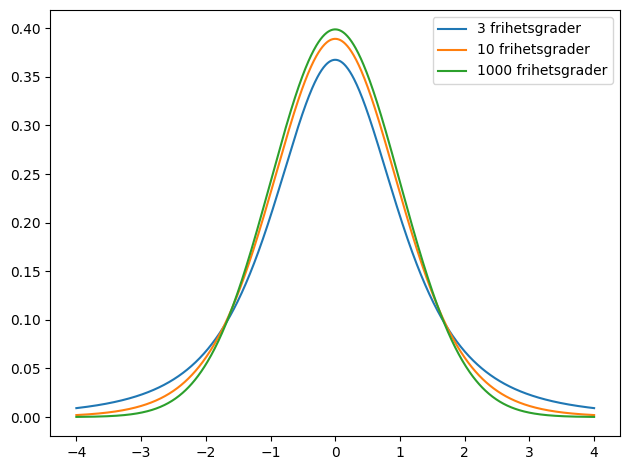

In [31]:
# Antall frihetsgrader
dfs = [3, 10, 1000]

# Sett opp verdier for x-aksen
x = np.linspace(-4, 4, 1000)

alpha = 0.05  # Signifikansnivå

for df in dfs:
    y = scipy.stats.t.pdf(x, df)  # t-fordeling med 10 frihetsgrader
    plt.plot(x, y, label=f'{df} frihetsgrader')

# y = norm.pdf(x)
# plt.plot(x, y + 0.002)

plt.legend()
plt.tight_layout()
plt.show()


## Overgang fra t-verdi til sannsynlighet, eller p-verdi

Vi antar at temperaturen $y$ er fordelt etter en normalfordeling med gjennomsnittsverdi $\mu$.

Gitt en $t$-verdi kan vi finne sannsynligheten for at $\mu \le \mu_0$ og hva sannsynligheten for at $\mu \ge \mu_0$.
Sannsynligheten for at $\mu = \mu_0$ er sannsynligheten for at b

Når vi vil gå fra $t$-verdi til $p$-verdi må vi bruke en $t$-fordeling
med $n-1$ frihetsgrader. Slike $t$-fordelinger er tabellført, og vi kan
finne $p$-verdien ved å se på tabellen. Det er også mulig å bruke en
datamaskin til å finne $p$-verdien, for eksempel med python.

Jeg vil bruke en to-utvalgs $t$-test Dette er en to-utvalgs $t$-test. La
$y^1_1, \dots, y^1_{1095}$ være de første 1095 målingene og
$y^2_1, \dots, y^2_{1095}$ være de siste 1095 målingene. Vi antar at
målingene er normalfordelte med ukjent varians $\sigma^2$.

hei deg:bn

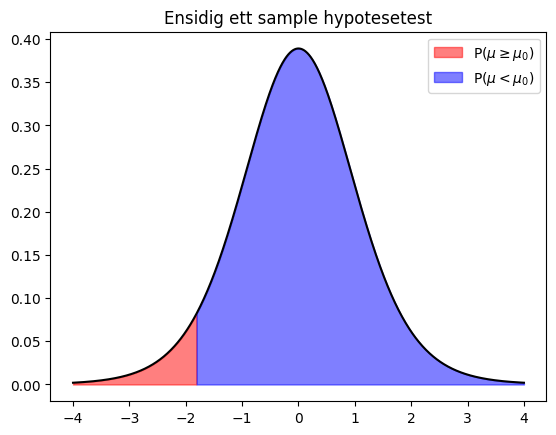

In [52]:
# Antall frihetsgrader
df = 10

# Sett opp verdier for x-aksen
x = np.linspace(-4, 4, 1000)
y = scipy.stats.t.pdf(x, df)  # t-fordeling med 10 frihetsgrader

alpha = 0.05  # Signifikansnivå
t_crit = scipy.stats.t.ppf(1 - alpha, df)  # Kritisk verdi for ensidig test
t_crit_two_sided = scipy.stats.t.ppf(1 - alpha / 2 , df) # Kritisk verdi for tosidig test


# Ensidig test: μ < μ0 (venstre hale)
plt.plot(x, y, color='black')
plt.fill_between(x, y, where=(x < -t_crit), color='red', alpha=0.5, label=r'P($\mu \geq \mu_0$)')
plt.fill_between(x, y, where=(x > -t_crit), color='blue', alpha=0.5, label=r'P($\mu < \mu_0$)')
plt.title(r"Ensidig ett sample hypotesetest")
plt.legend()
plt.show()


Nullhypotesen $\mu = \mu_0$ forkastes når sannsynligheten for alternativ hypotese $\mu < \mu_0$ er minst $95 \%$

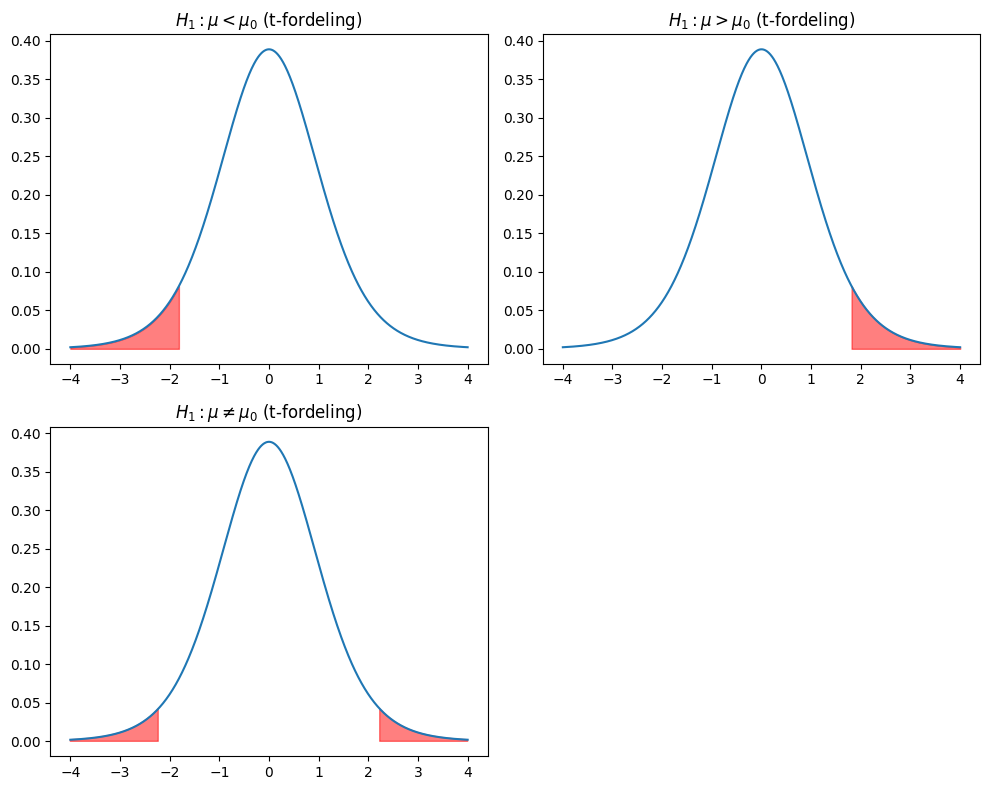

In [39]:
# Antall frihetsgrader
df = 10

# Sett opp verdier for x-aksen
x = np.linspace(-4, 4, 1000)
y = scipy.stats.t.pdf(x, df)  # t-fordeling med 10 frihetsgrader

alpha = 0.05  # Signifikansnivå
t_crit = scipy.stats.t.ppf(1 - alpha, df)  # Kritisk verdi for ensidig test
t_crit_two_sided = scipy.stats.t.ppf(1 - alpha / 2 , df) # Kritisk verdi for tosidig test

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Ensidig test: μ < μ0 (venstre hale)
axes[0].plot(x, y)
axes[0].fill_between(x, y, where=(x < -t_crit), color='red', alpha=0.5)
axes[0].set_title(r"$H_1: \mu < \mu_0$ (t-fordeling)")

# Ensidig test: μ > μ0 (høyre hale)
axes[1].plot(x, y)
axes[1].fill_between(x, y, where=(x > t_crit), color='red', alpha=0.5)
axes[1].set_title(r"$H_1: \mu > \mu_0$ (t-fordeling)")

# Tosidig test: μ ≠ μ0 (begge haler)
axes[2].plot(x, y)
axes[2].fill_between(x, y, where=(x < -t_crit_two_sided) | (x > t_crit_two_sided), color='red', alpha=0.5)
axes[2].set_title(r"$H_1: \mu \neq \mu_0$ (t-fordeling)")

# Fjern tomme subplot
fig.delaxes(axes[3])

plt.tight_layout()
plt.show()


De skraverte feltene tilsvarer områder der vi forkaster nullhypotesen med tre ulike tilfeller av
alternativhypotesen. Det første tilfellet tilsvarer alternativ-hypotese µ < $\mu_0$, det andre tilsvarer alternativ-
hypotese µ > $\mu_0$ og det siste tilsvarer µ $\ne \mu_0$  som gir oss en tosidig test.

In [ ]:
# @title Plotter
# Define the function
def S_fra_A_og_y(A, y):
    ATA = A.T@A
    ATy = A.T@y
    yy = np.sum(y*y)
    def f(x):
        z = np.vstack((x[0].reshape(1, x[0].size), x[1].reshape(1, x[1].size)))
        r1 = np.sum(z * (ATA @ z), axis=0)
        r2 = -2 * np.sum(z * ATy, axis=0)
        r3 = yy
        return (r1 + r2 + r3).reshape(x[0].shape)
    return f

# Create a grid of x and y values
x1 = np.linspace(-5e-5, 2e-4, 300)
x2 = np.linspace(7.4, 7.7, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
S = S_fra_A_og_y(A, y)
x3 = S(x)

# # Mask values outside the unit disc
# mask = x**2 + y**2 > 1  # Create a boolean mask for points outside the unit disc
# z[mask] = np.nan  # Set values outside the unit disc to NaN (they won't be plotted)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], x3, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

In [ ]:
# @title Logaritmisk plot
# Define the function
def S_fra_A_og_y(A, y):
    ATA = A.T@A
    ATy = A.T@y
    yy = np.sum(y*y)
    def f(x):
        z = np.vstack((x[0].reshape(1, x[0].size), x[1].reshape(1, x[1].size)))
        r1 = np.sum(z * (ATA @ z), axis=0)
        r2 = -2 * np.sum(z * ATy, axis=0)
        r3 = yy
        return (r1 + r2 + r3).reshape(x[0].shape)
    return f

# Create a grid of x and y values
x1 = np.linspace(-5e-5, 2e-4, 300)
x2 = np.linspace(7.4, 7.7, 300)
x = np.meshgrid(x1, x2)

# Compute the function values
S = S_fra_A_og_y(A, y)
x3 = S(x)

# # Mask values outside the unit disc
# mask = x**2 + y**2 > 1  # Create a boolean mask for points outside the unit disc
# z[mask] = np.nan  # Set values outside the unit disc to NaN (they won't be plotted)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x[0], x[1], np.log(x3 - np.min(x3) + 1), cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

In [ ]:
# La oss avlese verdier for minimumspunkt
minidx = np.argmin(x3)

In [ ]:
# minste verdi vi har beregent for S(x)
x3.ravel()[minidx]

In [ ]:
# leser ut tilhørende verdier av x1 og x2
x[0].ravel()[[minidx]], x[1].ravel()[[minidx]]

In [ ]:
# Hjelpestørrelser for analytisk beregning av av regresjonslinje

Ey = np.mean(y)
Eyt = np.mean(y * t)
Et = np.mean(t)
Ett = np.mean(t * t)

Husk: $x_1 = \frac{E(\mathbf{y}\mathbf{t}) - E(\mathbf{t})E(\mathbf{y})}{E(\mathbf{t}^2) - E(\mathbf{t})^2}$
og $x_2 = E(\mathbf{y}) - x_1E(\mathbf{t})$

In [ ]:
# Beregner heldning og hvor regresjonslinje krysser y-aksen
x1 = (Eyt - Et * Ey)/(Ett - Et * Et)
x2 = Ey - x1 * Et

# Legger x1 og x2 inn i en vektor
xx = np.array([[x1],[x2]])

# Beregner regresjonslinjen
L= x1 * t + x2

In [ ]:
# Kostverdien for det analytisk beregnede minimumspunkt
S(xx)

In [ ]:
# Legger regresjonslinjen inn i pandas dataframe
data['L'] = L

In [ ]:
# Plotter daglige temperaturer og regresjonslinjen mot tid
data.plot(y=['tavg', 'L'])

Vi sjekker at vår beregning stemmer overens med sklearn sin beregning:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regr = LinearRegression()
regr.fit(t, y)

In [ ]:
data['Lsk'] = regr.predict(t)

In [ ]:
np.allclose(data['L'], data['Lsk'])

In [ ]:
# Beregner rullende gjennomsnitt
data['Rolling_Mean_tavg'] = data['tavg_ffill'].rolling(5 * 365, center=True).mean()

### <font color='DarkCyan'> Spørsmål:</font>

<font color='Crimson'>Hva forteller figuren under til oss?</font>

In [ ]:
data.plot(y=['Rolling_Mean_tavg', 'L'])

## Hypotese:

**Temperaturen har steget med minst en grad siden temperaturmålingen begynte**

## Sesongvariasjoner

Ser vi litt nøyere på våre data finner vi ut at temperaturen svinger i løpet av ett år.

In [ ]:
# Plotter daglige temperaturer og regresjonslinjen mot tid
data.loc[end - timedelta(weeks=500): end].plot(y=['tavg', 'L'])

Vi kan prøve å ta det med inn i vår regresjon ved å legge til to kolonner i matrisen A som inneholder en sinus og en cosinus funksjon med periode ett år. La oss kalle matrisen vi får på denne måten B:

In [ ]:
B = np.hstack([t, np.ones_like(t), np.sin((2 * np.pi * t) / 365.2425), np.cos((2 * np.pi * t) / 365.2425)])#, np.sin((4 * np.pi * t) / 365), np.cos((4 * np.pi * t) / 365)])

På samme måten som vi fant koeffisienter for konstant- og lineært bidrag kan vi finne koeffisienter for de periodiske bidragene også:

In [ ]:
xxx = np.linalg.solve(B.T @ B, B.T @ y)

Vi finner fire koeffisienter:

In [ ]:
xxx

I sted fant vi to koeffisienter. Bemerk at koefisientene for konstant- og lineærdel er nesten de samme i begge sett av koeffisienter:

In [ ]:
xx

In [ ]:
data['årlig_forutsigelse'] = B @ xxx

In [ ]:
data['trend'] = B[:, :2] @ xxx[:2]

In [ ]:
data.plot(y=['tavg_ffill', 'årlig_forutsigelse'])

For å se om vi fanger den årlige svingningen plotter vi for en kortere tidsperiode:

In [ ]:
data.loc[end - timedelta(weeks=500): end].plot(y=['tavg_ffill', 'årlig_forutsigelse'], style='-');

Vi kan se hva forskjellen mellom forutsigelse og faktisk temperatur er:

In [ ]:
data['årlig_residual'] = data['årlig_forutsigelse'] - data['tavg_ffill']

In [ ]:
data.loc[end - timedelta(weeks=500): end].plot(y=['årlig_residual',], style='.');

Vi kan også tegne et histogram over årlig redidual og se om det passer med en normalfordeling:

In [ ]:
data['årlig_residual'].plot.hist(bins=30)

In [ ]:
from scipy.stats import norm

In [ ]:
mu, std = norm.fit(data['årlig_residual'])
data['årlig_residual'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title);

Vi kan gjøre det samme for feilen til den lineære regresjon:

In [ ]:
data['lineært_residual'] = data['L'] - data['tavg_ffill']

In [ ]:
mu, std = norm.fit(data['lineært_residual'])
data['lineært_residual'].plot(kind='hist', bins=30, density=True)
range = np.arange(-10, 10, 0.01)
# plt.plot(range, norm.pdf(range,0,4))
xmin, xmax = plt.xlim()
plt.plot(np.linspace(xmin, xmax, 100), norm.pdf(np.linspace(xmin, xmax, 100), mu, std), 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title);

Vi kan også se om den periodiske svingningen vi har lagt til fanger den årlige variasjonen:

In [ ]:
data['trend'].values

In [ ]:
plt.scatter(t%365, y - L, s=10, alpha=0.1)
plt.plot(t[:366], data.loc[start: start + timedelta(days=365)]['årlig_forutsigelse'].values - data.loc[start: start + timedelta(days=365)]['trend'].values, color='red')

In [ ]:
data.loc[end - timedelta(weeks=200): end].plot(y=['tavg_ffill', 'årlig_forutsigelse'], style='-');